# Data Exploration

In [1]:
#Importing the necessary packages
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import math
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [2]:
#Impoprting the data
riv_stock_df = pd.read_csv('data/RIVN.csv')
riv_stock_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-11-10,106.750000,119.459999,95.199997,100.730003,100.730003,103679500
1,2021-11-11,114.625000,125.000000,108.010002,122.989998,122.989998,83668200
2,2021-11-12,128.645004,135.199997,125.250000,129.949997,129.949997,50636800
3,2021-11-15,130.800003,152.529999,127.510002,149.360001,149.360001,64982300
4,2021-11-16,163.800003,179.470001,153.779999,172.009995,172.009995,94036600


In [3]:
#Checking the information
riv_stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       241 non-null    object 
 1   Open       241 non-null    float64
 2   High       241 non-null    float64
 3   Low        241 non-null    float64
 4   Close      241 non-null    float64
 5   Adj Close  241 non-null    float64
 6   Volume     241 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.3+ KB


In [4]:
riv_stock_df = riv_stock_df.set_index(pd.to_datetime(riv_stock_df['Date']), drop=True)

In [5]:
riv_stock_df

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2021-11-10,2021-11-10,106.750000,119.459999,95.199997,100.730003,100.730003,103679500
2021-11-11,2021-11-11,114.625000,125.000000,108.010002,122.989998,122.989998,83668200
2021-11-12,2021-11-12,128.645004,135.199997,125.250000,129.949997,129.949997,50636800
2021-11-15,2021-11-15,130.800003,152.529999,127.510002,149.360001,149.360001,64982300
2021-11-16,2021-11-16,163.800003,179.470001,153.779999,172.009995,172.009995,94036600
...,...,...,...,...,...,...,...
2022-10-19,2022-10-19,30.910000,31.760000,30.570000,31.500000,31.500000,10644900
2022-10-20,2022-10-20,31.100000,32.160000,30.370001,30.730000,30.730000,10633200
2022-10-21,2022-10-21,30.389999,32.000000,30.090000,31.920000,31.920000,9913300


In [6]:
#Converting date format to datetime for future plotting and calculations
riv_df = riv_stock_df

In [7]:
#Checking information
riv_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2021-11-10,2021-11-10,106.750000,119.459999,95.199997,100.730003,100.730003,103679500
2021-11-11,2021-11-11,114.625000,125.000000,108.010002,122.989998,122.989998,83668200
2021-11-12,2021-11-12,128.645004,135.199997,125.250000,129.949997,129.949997,50636800
2021-11-15,2021-11-15,130.800003,152.529999,127.510002,149.360001,149.360001,64982300
2021-11-16,2021-11-16,163.800003,179.470001,153.779999,172.009995,172.009995,94036600


In [8]:
#Checking for any missing values
riv_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
riv_df.index[0].month

11

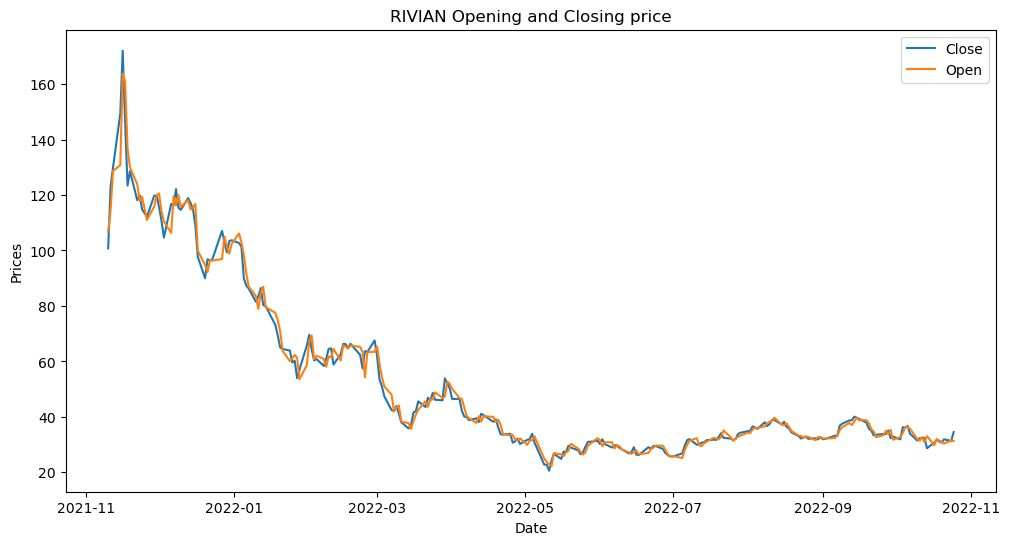

In [10]:
#Plotting the opening and closing price
plt.figure(figsize=(12,6))
plt.xlabel('Date')
plt.ylabel('Prices')
plt.plot(riv_df['Close'])
plt.plot(riv_df['Open'])
plt.title('RIVIAN Opening and Closing price')
plt.legend(['Close', 'Open'])
plt.show()

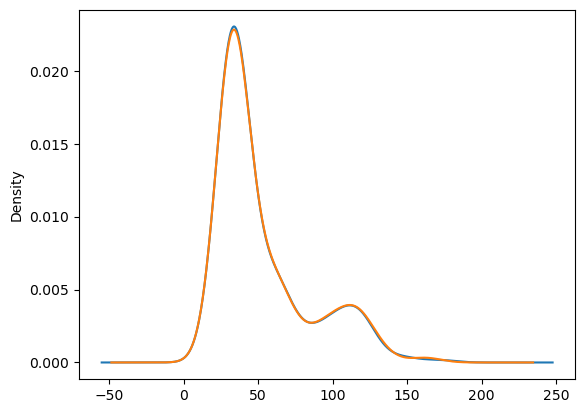

In [11]:
#Checking distribution of the dataset
riv_df_close = riv_df['Close']
riv_df_open = riv_df['Open']
riv_df_close.plot(kind='kde')
riv_df_open.plot(kind='kde');

In [12]:
#https://www.codingfinance.com/post/2018-04-03-calc-returns-py/
#Calculating daily and monthly return
riv_daily_return = pd.DataFrame(riv_df['Adj Close'].pct_change())
riv_monthly_return=pd.DataFrame(riv_df['Adj Close'].resample('M').ffill().pct_change())

In [13]:
#Chceking output
riv_daily_return

,Adj Close
Date,
2021-11-10,NaN
2021-11-11,0.220987
2021-11-12,0.056590
2021-11-15,0.149365
2021-11-16,0.151647
...,...
2022-10-19,-0.004425
2022-10-20,-0.024444
2022-10-21,0.038724


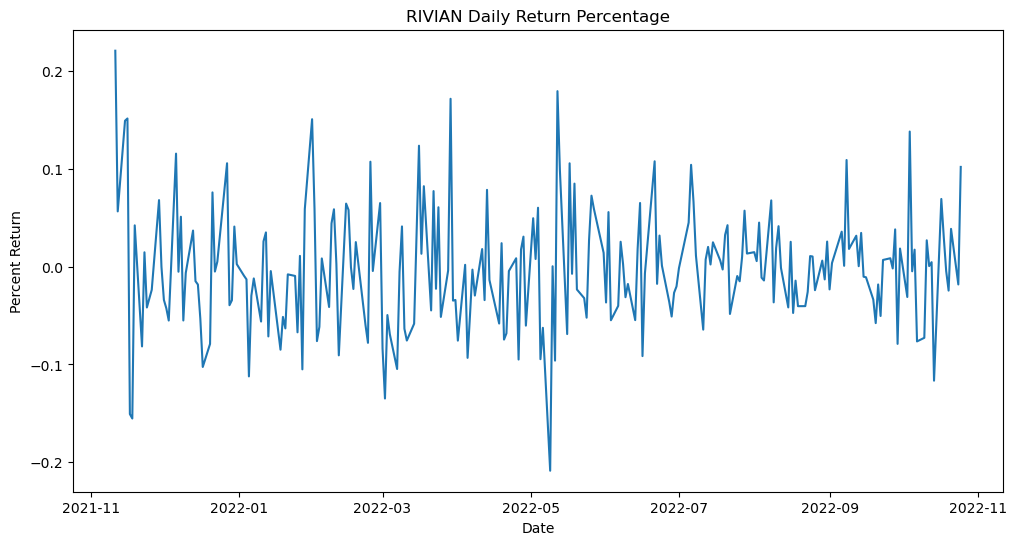

In [14]:
#Visualizing daily return
plt.figure(figsize=(12,6))
plt.xlabel('Date')
plt.ylabel('Percent Return')
plt.plot(riv_daily_return)
plt.title('RIVIAN Daily Return Percentage')
plt.show()

In [15]:
#Checking output
riv_monthly_return

,Adj Close
Date,
2021-11-30,NaN
2021-12-31,-0.134185
2022-01-31,-0.365995
2022-02-28,0.027685
2022-03-31,-0.256365
2022-04-30,-0.398089
2022-05-31,0.038360
2022-06-30,-0.180255
2022-07-31,0.332556


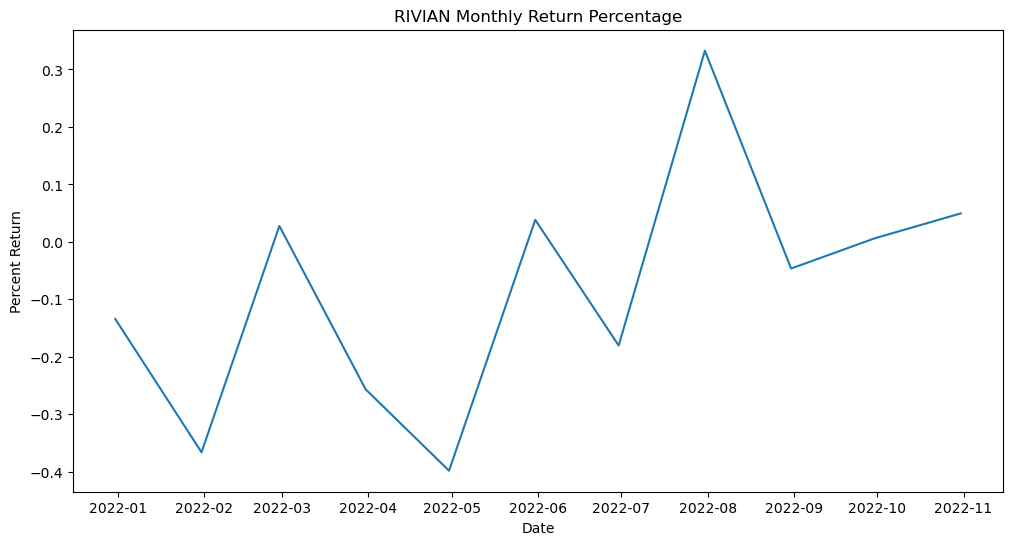

In [16]:
#Visualizing monthly return
plt.figure(figsize=(12,6))
plt.xlabel('Date')
plt.ylabel('Percent Return')
plt.plot(riv_monthly_return)
plt.title('RIVIAN Monthly Return Percentage')
plt.show()

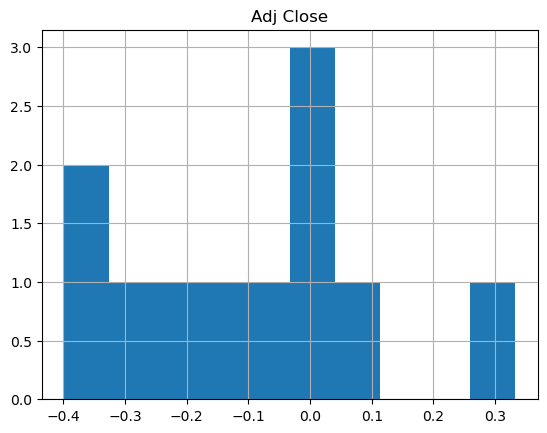

In [17]:
riv_monthly_return.hist();

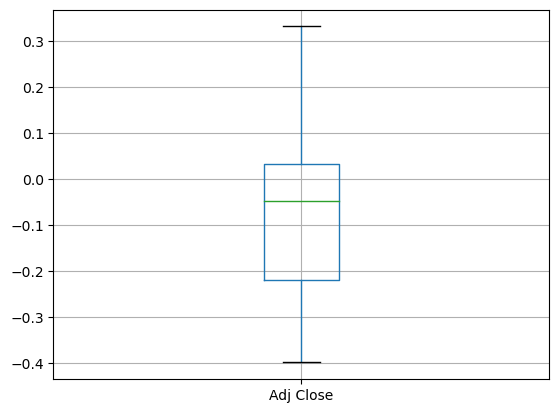

In [18]:
riv_monthly_return.boxplot();

In [19]:
# https://blog.devgenius.io/how-to-calculate-the-daily-returns-and-volatility-of-a-stock-with-python-d4e1de53e53b
#Calculating Volatility
daily_volatility_rivn = riv_daily_return['Adj Close'].std()
print('Daily volatility: \n --------------')
print('Rivian: ', '{:.2f}%'.format(daily_volatility_rivn))
print('\n')
monthly_volatility_rivn = math.sqrt(21) * daily_volatility_rivn
print('Monthly volatility: \n --------------')
print ('Rivian: ', '{:.2f}%'.format(monthly_volatility_rivn))
print('\n')
annual_volatility_rivn = math.sqrt(252) * daily_volatility_rivn
print('Annual volatility: \n --------------')
print ('Rivian: ', '{:.2f}%'.format(annual_volatility_rivn ))

Daily volatility: 
 --------------
Rivian:  0.06%


Monthly volatility: 
 --------------
Rivian:  0.28%


Annual volatility: 
 --------------
Rivian:  0.97%


In [20]:
# Creating function for assessment
def test_trend(ts_df):
    #Getting rolling statistics
    roll_mean = ts_df.rolling(11).mean()
    roll_std = ts_df.rolling(11).std()
    #Plotting rolling statistics
    fig = plt.figure(figsize=(12,7))
    plt.plot(ts_df, color='blue', label='Original')
    plt.plot(roll_mean, color='red', label='Rolling Mean')
    plt.plot(roll_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    print("Results of the Dickey-Fuller Test")
    dftest = adfuller(ts_df)
    # Output for dickey-fuller test will give us the values without defining what the values are.
    # Manually writing the values
    dfoutput = pd.Series(dftest[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in dftest[4].items():
        dfoutput['critical value (%s)'%key] =  values
    print(dfoutput)
    print('\n\n')
    print("Results of KPSS Test:")
    kpsstest = kpss(ts_df, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

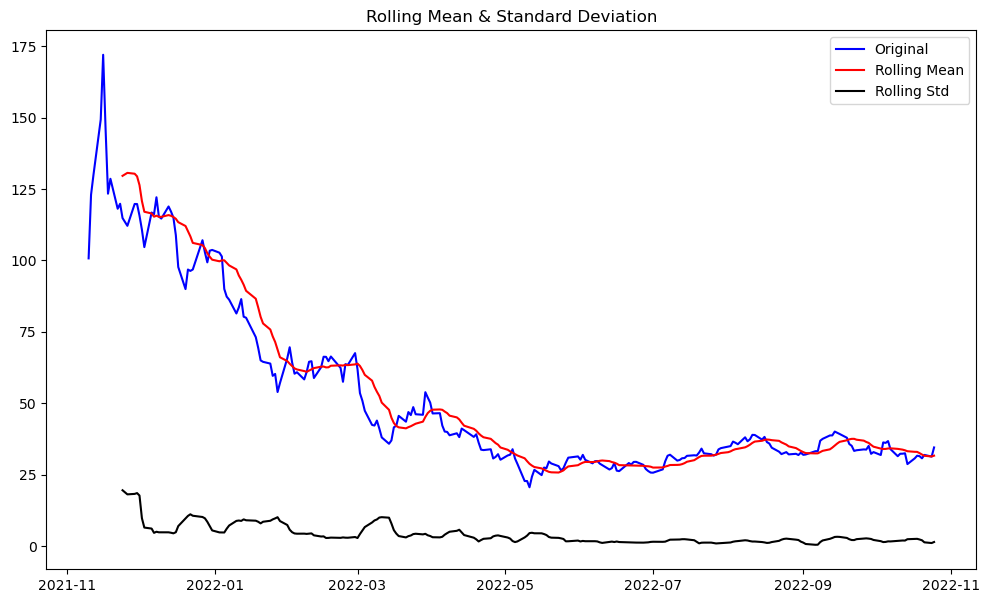

Results of the Dickey-Fuller Test
Test Statistics                 -3.210784
p-value                          0.019369
No. of lags used                 8.000000
Number of observations used    232.000000
critical value (1%)             -3.458855
critical value (5%)             -2.874080
critical value (10%)            -2.573453
dtype: float64



Results of KPSS Test:
Test Statistic            1.657514
p-value                   0.010000
Lags Used                10.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\Jonathan\anaconda3\envs\time-series-env\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [21]:
test_trend(riv_df['Close'])

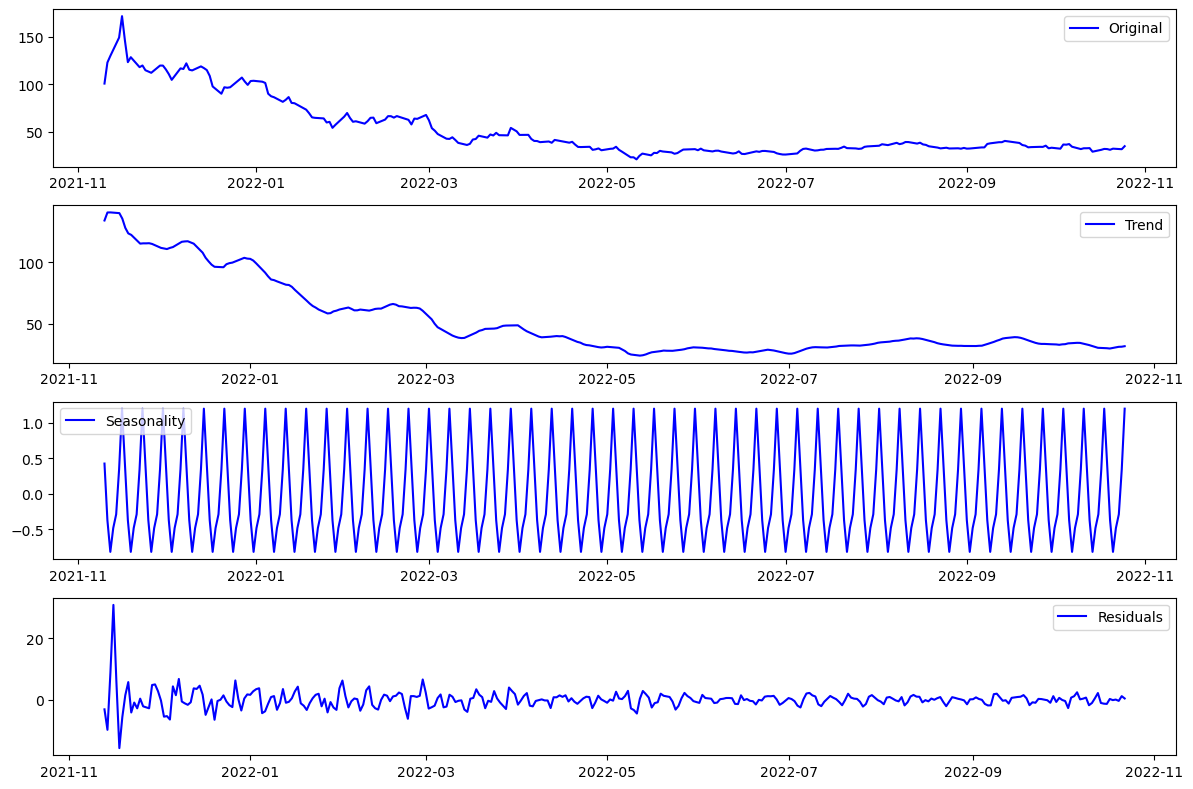

In [22]:
#Decomposing the closing data
decomposition = seasonal_decompose(riv_df['Close'].asfreq('d').ffill(), model = "additive")

# Gather the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal 
residual = decomposition.resid

# Plotting original, trend, seasonality, residuals
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(riv_df_close, label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

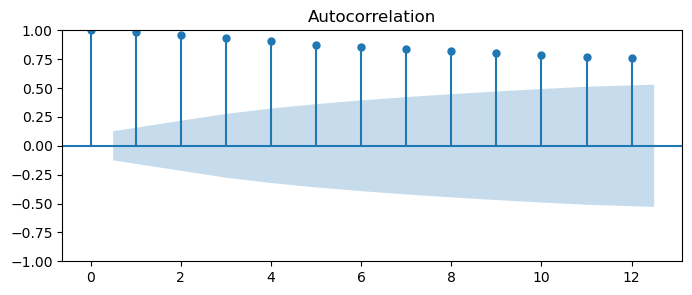

In [23]:
#Plotting the AutoCorrelation function
fig, ax = plt.subplots(figsize=(8,3))
plot_acf(riv_df['Close'],ax=ax, lags=12);

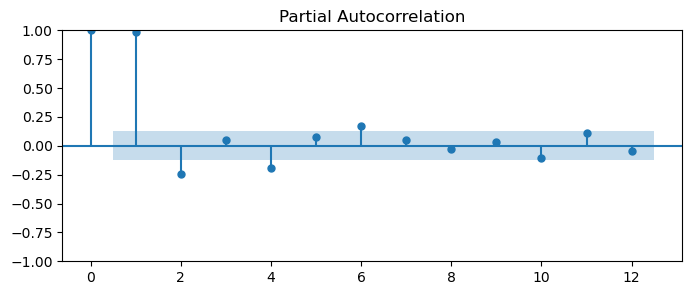

In [24]:
#Plotting the Partial AutoCorrelation Function
fig, ax = plt.subplots(figsize=(8,3))
plot_pacf(riv_df['Close'],ax=ax, lags=12, method='ywm');

## DETRENDING 

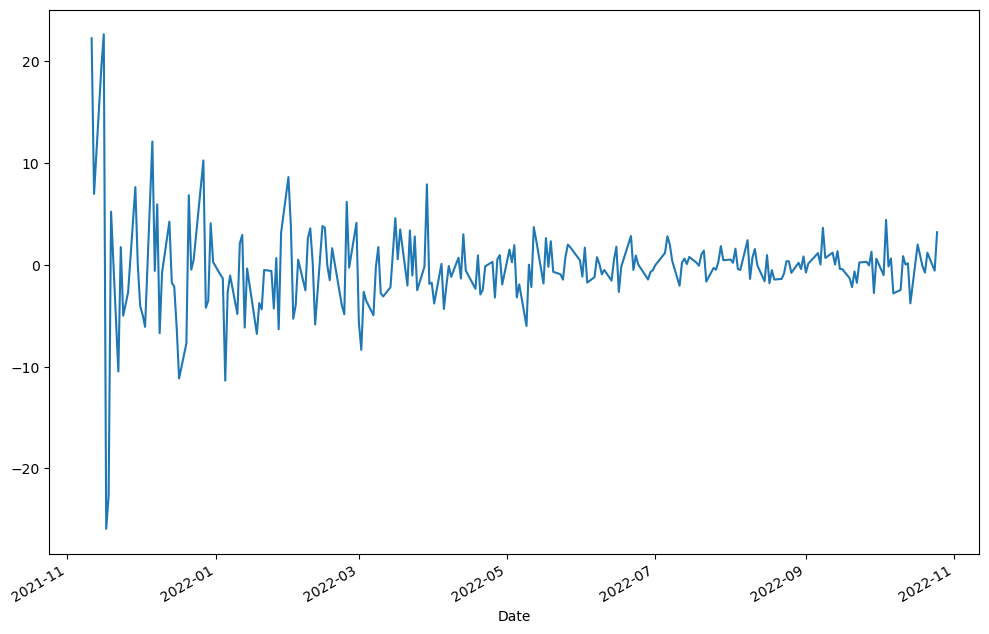

In [25]:
#Shifting the data 1 lag and subtracting it from original data
riv_df["close_diff"] = riv_df['Close'] - riv_df['Close'].shift(1)
riv_df["close_diff"].dropna().plot(figsize=(12, 8));

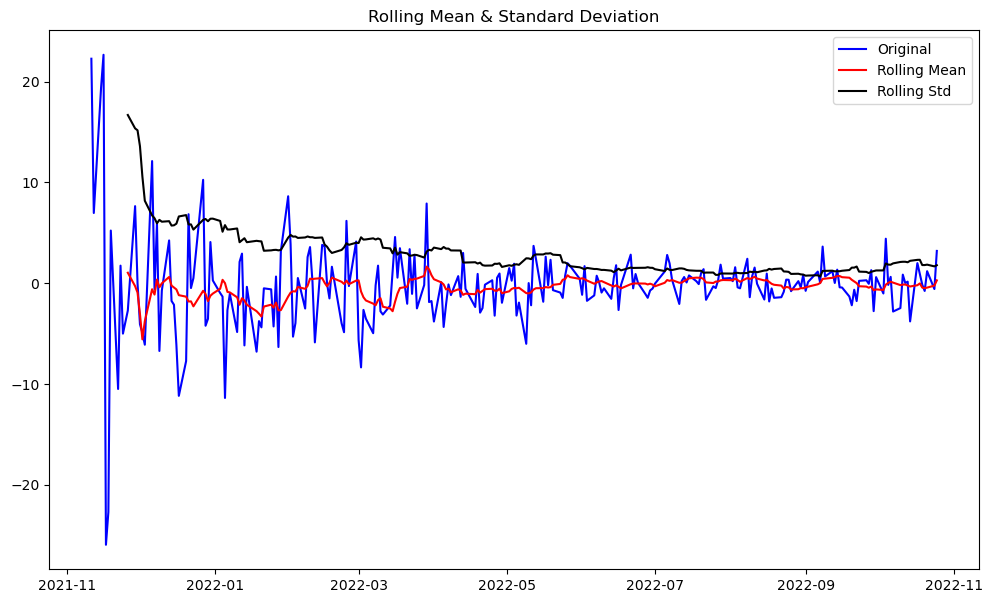

Results of the Dickey-Fuller Test
Test Statistics               -6.616987e+00
p-value                        6.171787e-09
No. of lags used               7.000000e+00
Number of observations used    2.320000e+02
critical value (1%)           -3.458855e+00
critical value (5%)           -2.874080e+00
critical value (10%)          -2.573453e+00
dtype: float64



Results of KPSS Test:
Test Statistic           0.108575
p-value                  0.100000
Lags Used                1.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


C:\Users\Jonathan\anaconda3\envs\time-series-env\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [26]:
#Checking tests on shifted data
test_trend(riv_df['close_diff'].dropna())

# Model Preparation

In [34]:
#Splitting data into train and test
train, test = np.split(riv_df['Close'], [int(.75 *len(riv_df['Close']))])

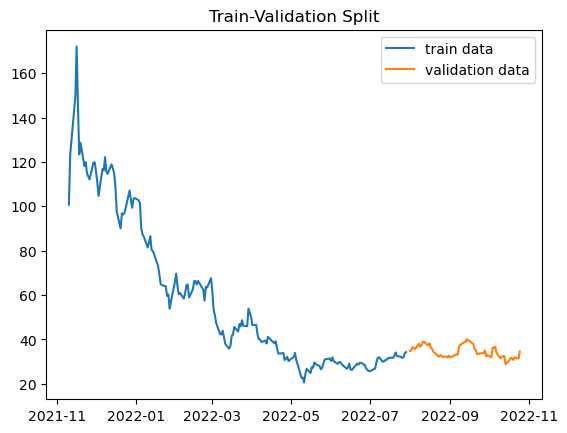

In [35]:
#Plotting train and split
fig, ax = plt.subplots()
ax.plot(train, label = 'train data')
ax.plot(test, label = 'validation data')

ax.set_title("Train-Validation Split")

plt.legend();
